In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("spam.csv", encoding='ISO-8859–1')

In [40]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
806,ham,"sure, but make sure he knows we ain't smokin yet",NaN,NaN,NaN
4119,ham,Babe! How goes that day ? What are you up to ?...,NaN,NaN,NaN
506,ham,"Maybe westshore or hyde park village, the plac...",NaN,NaN,NaN
216,ham,Tired. I haven't slept well the past few nights.,NaN,NaN,NaN
3223,ham,Sorry da thangam.it's my mistake.,NaN,NaN,NaN


In [41]:
df.shape

(5572, 5)

## 1. Data Cleaning 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [43]:
#drop last three columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [44]:
df.sample(5)

,v1,v2
161,ham,New car and house for my parents.:)i have only...
925,ham,"K, wait chikku..il send aftr &lt;#&gt; mins"
3756,spam,YES! The only place in town to meet exciting a...
4145,ham,I canåÕt wait for cornwall. Hope tonight isnåÕ...
1090,spam,WIN URGENT! Your mobile number has been awarde...


In [45]:
#renaming the cols
df.rename(columns= {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
3081,ham,"And very importantly, all we discuss is betwee..."
1249,ham,"I call you later, don't have network. If urgnt..."
1940,ham,Dude avatar 3d was imp. At one point i thought...
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...
2524,spam,FREE entry into our å£250 weekly comp just sen...


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
df['target'] = encoder.fit_transform(df['target'])

In [48]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [50]:
#check for duplicate values
df.duplicated().sum()

403

In [51]:
#remove duplicate values
df = df.drop_duplicates(keep = 'first')

In [52]:
df.duplicated().sum()

0

In [53]:
df.shape

(5169, 2)

## 2. EDA 
exploratory data analysis ???

In [54]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

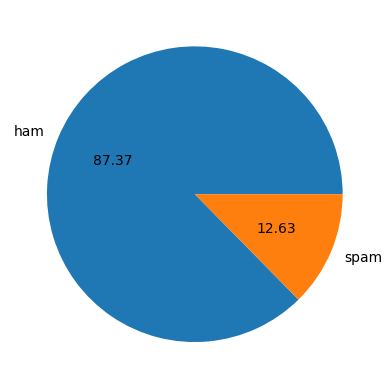

In [55]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [56]:
#data is imbalanced
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

making three new columns for number of characters, number of sentences and number of words

In [57]:
#number of characters
df['num_char'] =df['text'].apply(len)

In [58]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [60]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [61]:
#number of sentenes
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [62]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [63]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
#ham
df[df['target'] == 0][['num_char','num_words' ,'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [65]:
#spam
df[df['target'] == 1][['num_char','num_words' ,'num_sentences']].describe()


,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [66]:
#plotting a histogram for spam and ham
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

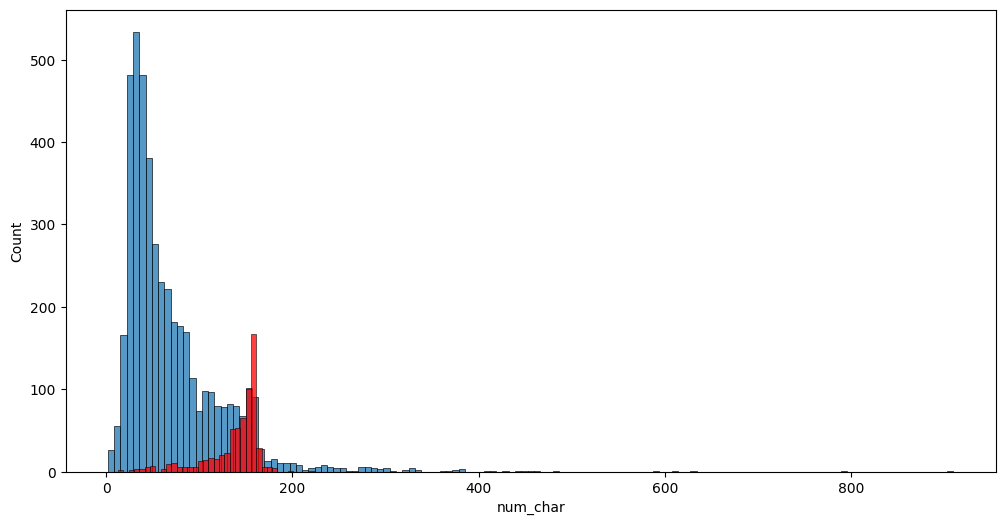

In [67]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] ==0]['num_char']) #ham
sns.histplot(df[df['target'] ==1]['num_char'], color = 'red') #spam 

spam are using more number of characters than ham

<AxesSubplot:xlabel='num_words', ylabel='Count'>

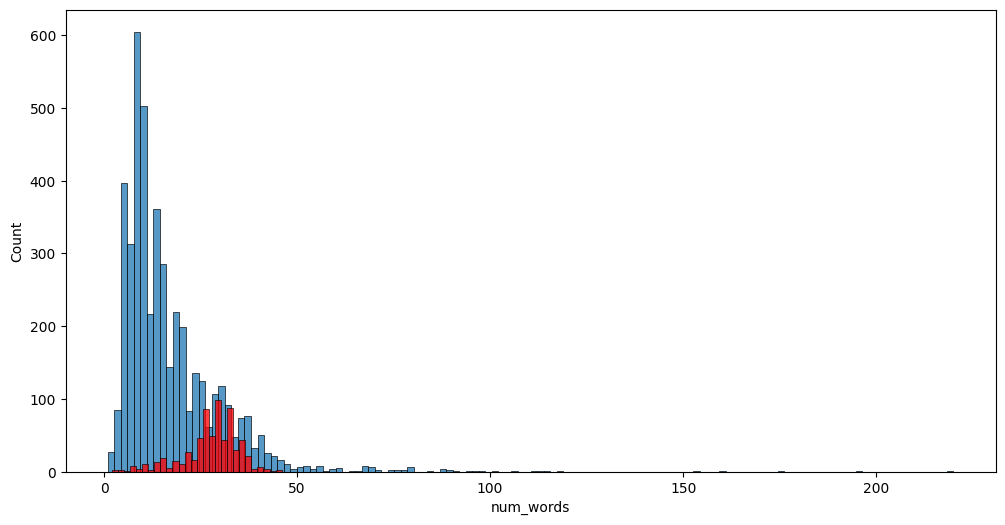

In [68]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] ==0]['num_words']) #ham
sns.histplot(df[df['target'] ==1]['num_words'], color = 'red') #spam 

also the spam are made of more words than ham 

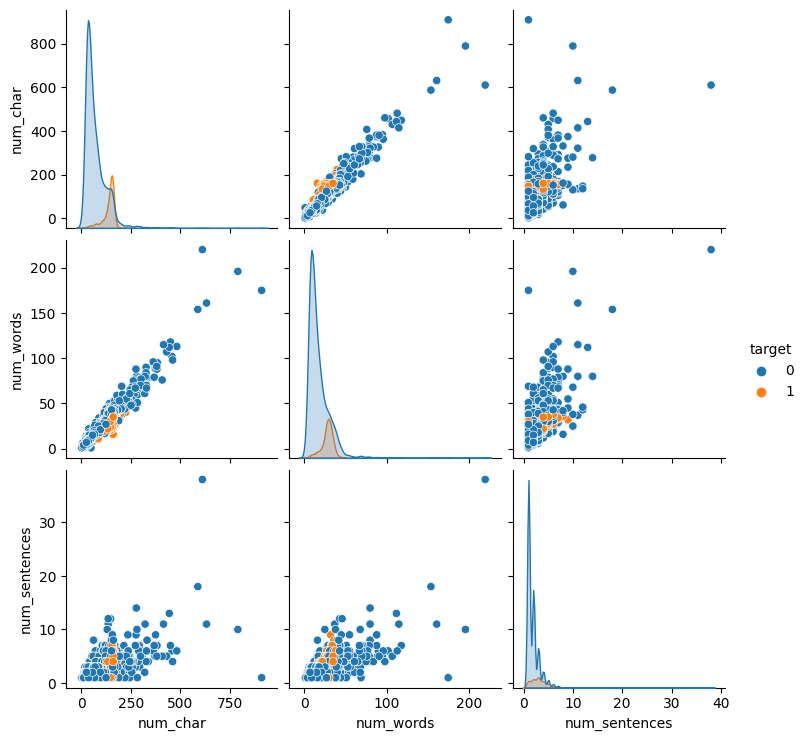

In [69]:
#to know the relationship between the columns
sns.pairplot(df, hue = 'target')

data contains outliers

<AxesSubplot:>

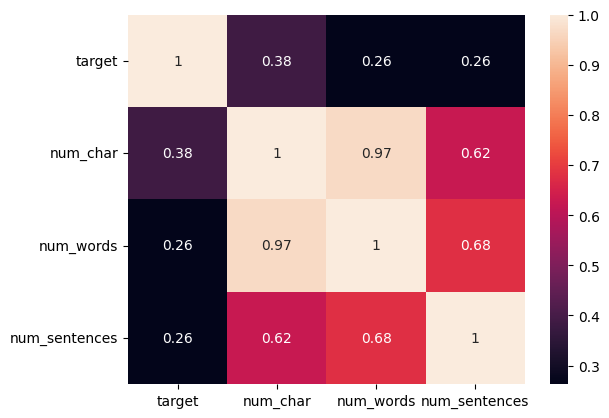

In [70]:
sns.heatmap(df.corr(), annot = True)

0.62, 0.68 , 0.68 are high correlation with each other so will take only one column among num_words, num_sentences and num_char
--that is num_char
cannot take all three due to high colliniarity

# 3. Data Preprocessing
- Lowercase 
- tokenisation
- removing special characters
- removing stop words and punchuations
- stemming 
    

In [71]:
from nltk.corpus import stopwords
import string
# string.punctuation
# stopwords.words('english')

In [74]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [75]:
def transform_text(text):
    text = text.lower() #convert to lowercase
    text = nltk.word_tokenize(text) #create a list of all the words

    y = [] #removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i  not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text: y.append(ps.stem(i))

    return " ".join(y)

In [76]:
transform_text('i loves the YT leactures on MAchine Learning. HOw about you')

'love yt leactur machin learn'

In [77]:
df['transformed_text'] = df['text'].apply(transform_text)

In [78]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


word cloud of ham and spam

In [84]:
from wordcloud import WordCloud
wc =  WordCloud(width = 500, height = 500, min_font_size= 10, background_color='white')

In [85]:
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

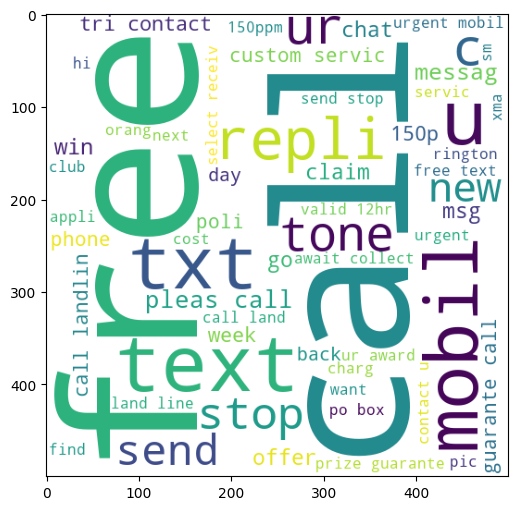

In [87]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [88]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

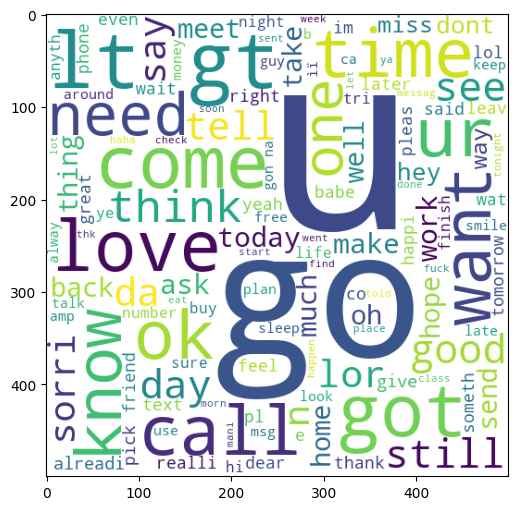

In [89]:
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

top 30 words of both ham and spam messages

In [90]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
